In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

covid_df = pd.read_csv('merged_df_ashv2.csv')

In [2]:
print(covid_df.columns)
print(covid_df.shape)
covid_df.head(20)

Index(['Date', 'MMWR_week', 'Recip_County', 'Recip_State', 'Completeness_pct',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       ...
       'AGE8084_MALE', 'AGE8084_FEM', 'AGE85PLUS_TOT', 'AGE85PLUS_MALE',
       'AGE85PLUS_FEM', 'MEDIAN_AGE_TOT', 'MEDIAN_AGE_MALE', 'MEDIAN_AGE_FEM',
       'GDP_current_dollar', 'personal_income'],
      dtype='object', length=253)
(51523, 253)


,Date,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,...,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM,GDP_current_dollar,personal_income
0,2020-02-21,19,Bryan County,OK,93.8,26225.0,54.6,26195.0,58.3,25819.0,...,424,587,912,337,575,37.4,36.0,38.7,1917349,40728
1,2020-02-21,19,Bryan County,OK,93.8,26225.0,54.6,26195.0,58.3,25819.0,...,424,587,912,337,575,37.4,36.0,38.7,280445536,56024
2,2020-02-28,19,Spokane County,WA,96.0,374252.0,71.6,371242.0,75.5,357702.0,...,4199,5498,10228,3528,6700,37.9,36.9,38.9,28473686,49083
3,2020-02-29,19,Dane County,WI,96.7,525490.0,95.0,513813.0,95.0,480996.0,...,3462,4750,9504,3178,6326,35.5,34.7,36.4,46459364,65500
4,2020-03-06,19,Fayette County,KY,94.1,265335.0,82.1,262822.0,86.4,250652.0,...,1964,2979,5249,1659,3590,35.1,34.1,36.2,21244943,55601
5,2020-03-07,19,Montgomery County,MD,98.2,1164986.0,95.0,1144180.0,95.0,1067289.0,...,8148,11465,23461,8042,15419,39.8,38.6,41.0,94007911,85373
6,2020-03-07,19,Fulton County,GA,88.8,714929.0,67.2,708121.0,70.6,680181.0,...,5376,8300,14272,4504,9768,36.0,35.1,37.0,187316255,92999
7,2020-03-07,19,Rockingham County,NH,93.7,258260.0,83.4,255918.0,86.6,246045.0,...,2671,3448,6403,2161,4242,44.8,43.5,46.0,23497713,81679
8,2020-03-07,19,Lee County,FL,98.6,584969.0,75.9,583797.0,79.4,572282.0,...,14414,15099,27672,11951,15721,49.2,47.8,50.5,35559878,58139
9,2020-03-08,19,Jefferson County,WA,96.0,28060.0,87.1,27849.0,89.0,27160.0,...,634,594,1043,450,593,59.4,58.1,60.4,1163365,56431


In [9]:
print(covid_df.columns.values)

['Date' 'MMWR_week' 'Recip_County' 'Recip_State' 'Completeness_pct'
 'Administered_Dose1_Recip' 'Administered_Dose1_Pop_Pct'
 'Administered_Dose1_Recip_5Plus' 'Administered_Dose1_Recip_5PlusPop_Pct'
 'Administered_Dose1_Recip_12Plus'
 'Administered_Dose1_Recip_12PlusPop_Pct'
 'Administered_Dose1_Recip_18Plus'
 'Administered_Dose1_Recip_18PlusPop_Pct'
 'Administered_Dose1_Recip_65Plus'
 'Administered_Dose1_Recip_65PlusPop_Pct' 'Series_Complete_Yes'
 'Series_Complete_Pop_Pct' 'Series_Complete_5Plus'
 'Series_Complete_5PlusPop_Pct' 'Series_Complete_5to17'
 'Series_Complete_5to17Pop_Pct' 'Series_Complete_12Plus'
 'Series_Complete_12PlusPop_Pct' 'Series_Complete_18Plus'
 'Series_Complete_18PlusPop_Pct' 'Series_Complete_65Plus'
 'Series_Complete_65PlusPop_Pct' 'Booster_Doses' 'Booster_Doses_Vax_Pct'
 'Booster_Doses_5Plus' 'Booster_Doses_5Plus_Vax_Pct'
 'Booster_Doses_12Plus' 'Booster_Doses_12Plus_Vax_Pct'
 'Booster_Doses_18Plus' 'Booster_Doses_18Plus_Vax_Pct'
 'Booster_Doses_50Plus' 'Booster

In [22]:
corr = covid_df.corr()
corr

,MMWR_week,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
MMWR_week,1.000000,0.006550,-0.021065,-0.033612,-0.020976,-0.033398,-0.020992,-0.032922,-0.021084,-0.032073,...,-0.022550,-0.022225,-0.022409,-0.022033,-0.021458,-0.021331,-0.021438,0.018935,0.019883,0.018480
Completeness_pct,0.006550,1.000000,0.077741,0.057641,0.078018,0.071082,0.078119,0.091896,0.078150,0.111123,...,0.087226,0.092169,0.095158,0.089815,0.087310,0.091946,0.084527,-0.162338,-0.157629,-0.165608
Administered_Dose1_Recip,-0.021065,0.077741,1.000000,0.413119,0.999984,0.407351,0.999764,0.391044,0.999389,0.378063,...,0.954618,0.944368,0.930859,0.951195,0.936123,0.917172,0.942308,-0.174390,-0.171976,-0.179258
Administered_Dose1_Pop_Pct,-0.033612,0.057641,0.413119,1.000000,0.412867,0.997219,0.412055,0.986110,0.412652,0.975914,...,0.397790,0.392769,0.394695,0.390318,0.394421,0.390152,0.395078,-0.029166,-0.033450,-0.033596
Administered_Dose1_Recip_5Plus,-0.020976,0.078018,0.999984,0.412867,1.000000,0.407185,0.999847,0.390973,0.999486,0.378024,...,0.955167,0.944987,0.931562,0.951753,0.936486,0.917688,0.942589,-0.174117,-0.171753,-0.178952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGE85PLUS_MALE,-0.021331,0.091946,0.917172,0.390152,0.917688,0.386646,0.920124,0.373978,0.923198,0.363432,...,0.984954,0.991980,0.992770,0.988647,0.994977,1.000000,0.988343,-0.078806,-0.081649,-0.081145
AGE85PLUS_FEM,-0.021438,0.084527,0.942308,0.395078,0.942589,0.391330,0.944423,0.377541,0.947232,0.366367,...,0.987271,0.990905,0.982390,0.994100,0.998619,0.988343,1.000000,-0.106726,-0.110204,-0.107822
MEDIAN_AGE_TOT,0.018935,-0.162338,-0.174390,-0.029166,-0.174117,-0.052742,-0.172264,-0.073147,-0.169840,-0.070504,...,-0.103645,-0.095067,-0.079370,-0.105807,-0.097373,-0.078806,-0.106726,1.000000,0.992033,0.985737
MEDIAN_AGE_MALE,0.019883,-0.157629,-0.171976,-0.033450,-0.171753,-0.057187,-0.170026,-0.077753,-0.167712,-0.075000,...,-0.106082,-0.097942,-0.081832,-0.108963,-0.100641,-0.081649,-0.110204,0.992033,1.000000,0.959570


## Checking Missing Values

In [4]:
covid_df.isnull().sum().head(50)

Date                                      0
MMWR_week                                 0
Recip_County                              0
Recip_State                               0
Completeness_pct                          0
Administered_Dose1_Recip                  0
Administered_Dose1_Pop_Pct                0
Administered_Dose1_Recip_5Plus            0
Administered_Dose1_Recip_5PlusPop_Pct     0
Administered_Dose1_Recip_12Plus           0
Administered_Dose1_Recip_12PlusPop_Pct    0
Administered_Dose1_Recip_18Plus           0
Administered_Dose1_Recip_18PlusPop_Pct    0
Administered_Dose1_Recip_65Plus           0
Administered_Dose1_Recip_65PlusPop_Pct    0
Series_Complete_Yes                       0
Series_Complete_Pop_Pct                   0
Series_Complete_5Plus                     0
Series_Complete_5PlusPop_Pct              0
Series_Complete_5to17                     0
Series_Complete_5to17Pop_Pct              0
Series_Complete_12Plus                    0
Series_Complete_12PlusPop_Pct   

Not many missing values, not much need for imputting, mainly only in comm_covid_inpatient_bed_utilization (99 missing) and
comm_covid_hospital_admissions_per_100k (10 missing)

## Testing Potential Response Variables

<AxesSubplot:xlabel='cases', ylabel='Density'>

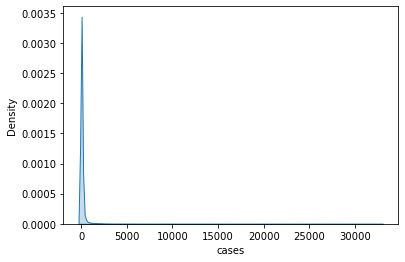

In [11]:
response_clean = covid_df['cases']
sns.kdeplot(response_clean, fill=True, bw_method = .1)

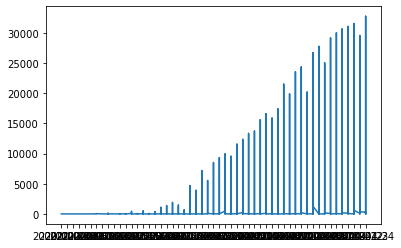

In [10]:
x = covid_df['Date']
y = covid_df['cases']
 
plt.plot(x, y)  # Plot the chart
plt.show()  # display

In [ ]:
x = covid_df['STNAME']
y = covid_df['cases']
 
plt.bar(x, y)  # Plot the chart
plt.show()  # display

## Continuous

In [14]:
num_cols = covid_df._get_numeric_data().columns
print(num_cols.values)

['MMWR_week' 'Completeness_pct' 'Administered_Dose1_Recip'
 'Administered_Dose1_Pop_Pct' 'Administered_Dose1_Recip_5Plus'
 'Administered_Dose1_Recip_5PlusPop_Pct' 'Administered_Dose1_Recip_12Plus'
 'Administered_Dose1_Recip_12PlusPop_Pct'
 'Administered_Dose1_Recip_18Plus'
 'Administered_Dose1_Recip_18PlusPop_Pct'
 'Administered_Dose1_Recip_65Plus'
 'Administered_Dose1_Recip_65PlusPop_Pct' 'Series_Complete_Yes'
 'Series_Complete_Pop_Pct' 'Series_Complete_5Plus'
 'Series_Complete_5PlusPop_Pct' 'Series_Complete_5to17'
 'Series_Complete_5to17Pop_Pct' 'Series_Complete_12Plus'
 'Series_Complete_12PlusPop_Pct' 'Series_Complete_18Plus'
 'Series_Complete_18PlusPop_Pct' 'Series_Complete_65Plus'
 'Series_Complete_65PlusPop_Pct' 'Booster_Doses' 'Booster_Doses_Vax_Pct'
 'Booster_Doses_5Plus' 'Booster_Doses_5Plus_Vax_Pct'
 'Booster_Doses_12Plus' 'Booster_Doses_12Plus_Vax_Pct'
 'Booster_Doses_18Plus' 'Booster_Doses_18Plus_Vax_Pct'
 'Booster_Doses_50Plus' 'Booster_Doses_50Plus_Vax_Pct'
 'Booster_Dose